In [1]:
#Multiple Linear Regression

In [72]:
## Housing Case Study

#### Problem Statement:

#Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

#Essentially, the company wants —


#- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

#- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

#- To know the accuracy of the model, i.e. how well these variables can predict house prices.


In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

In [252]:
housing=pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#DATA PREPARATION

In [253]:
#Data for modelling
#Convert Yes/No variables
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [254]:
housing.mainroad.value_counts()
housing[varlist]=housing[varlist].apply(lambda x: x.map({'yes':1,'no':0}))

In [255]:
housing.head()#checking housing dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [256]:
status=pd.get_dummies(housing.furnishingstatus)

In [257]:
status.head()
#dropping redunant dummy var
status=pd.get_dummies(housing.furnishingstatus,drop_first=True)

In [258]:
status.head() #checking what dataset 'status' looks like

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [259]:
housing=pd.concat([housing,status],axis=1)

In [260]:
housing=housing.drop('furnishingstatus',axis=1)

In [261]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [318]:
#Split dataset
df_train,df_test=train_test_split(housing,train_size=0.7,random_state=100)

#Scaling

In [263]:
from sklearn.preprocessing import MinMaxScaler

In [264]:
scaler=MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [265]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


#Divide into X and Y set for model 

In [266]:
y_train = df_train.pop('price')
X_train = df_train

#RFE

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [268]:
#model building
lm=LinearRegression()
lm.fit(X_train,y_train)
#Pass model to RFE and  number of var to choose)
rfe= RFE(lm,n_features_to_select = 10)

In [269]:
rfe=rfe.fit(X_train,y_train)

In [270]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [271]:
col=X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

#Build model using statsmodel using RFE supported variables

In [301]:
X_train_rfe=X_train[col]
X_train_rfe

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
53,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
350,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
79,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [302]:
import statsmodels.api as sm

# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
53,1.0,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
350,1.0,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
79,1.0,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [303]:
lr = sm.OLS(y_train, X_train_rfe).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.28e-82
Time:                        00:25:15   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Bedrooms is insignficant and can be dropped

Bedroom is insignificnt .Look at P value

In [304]:
X_train_new=X_train_rfe.drop('bedrooms',axis=1)#drop bedrooms

#Rebuild model without bedrooms

In [307]:
#X_train_new.head()
X_train_lm=sm.add_constant(X_train_new)

In [308]:
lr = sm.OLS(y_train, sm.add_constant(X_train_lm)).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           6.67e-83
Time:                        00:28:24   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [310]:
X_train_new = X_train_new.drop(['const'], axis=1)

#Calculate VIF to be sure #not needed

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
vif = pd.DataFrame()
X=X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [313]:
y_train_pred=lr.predict(sm.add_constant(X_train_new))

In [314]:
y_train_pred

359    0.136896
19     0.471955
159    0.318751
35     0.514123
28     0.481968
         ...   
526    0.105859
53     0.475592
350    0.261818
79     0.451167
520    0.200000
Length: 381, dtype: float64

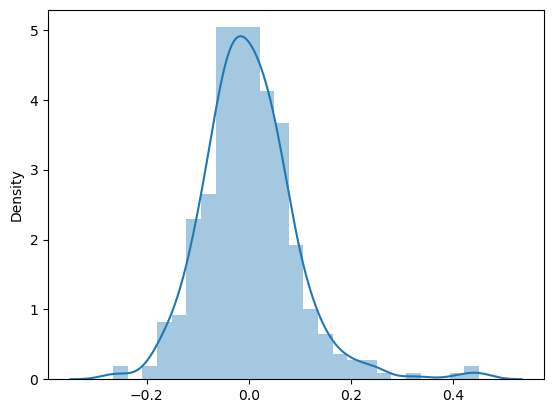

In [315]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

#Making Predictions

In [316]:
# Model- train data set
# transform-test data set

In [319]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [320]:
#Create xtrain and ytrain
y_test = df_test.pop('price')
X_test = df_test

In [322]:

X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#Model Evaluation

In [325]:
#predict.
y_test_pred=lr.predict(X_test_new)

In [328]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

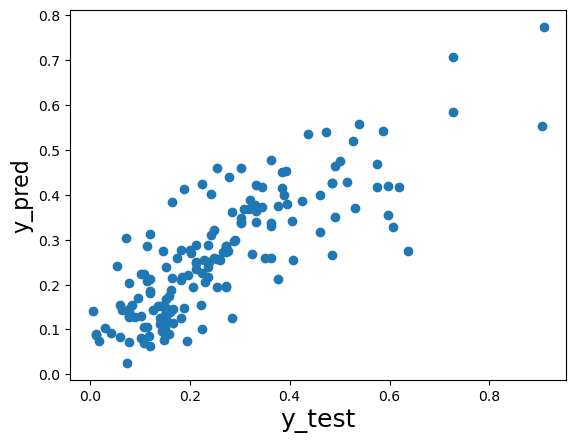

In [331]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()